In [ ]:
pip install beautifulsoup4 requests

In [9]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import time
import random

def scrape_noon_products(base_url, num_products=200):
    products = []
    page = 1

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    while len(products) < num_products:
        url = f"{base_url}?page={page}"
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')

        product_cards = soup.find_all('div', class_='sc-66eca60f-0 EYQUt')

        if not product_cards:
            print(f"No products found on page {page}. Ending scrape.")
            break

        for card in product_cards:
            if len(products) >= num_products:
                break

            name_tag = card.find('div', {'data-qa': 'product-name'})
            product_name = name_tag.get('title') if name_tag else 'N/A'

            price_tag = card.find('strong', class_='amount')
            product_price = price_tag.text if price_tag else 'N/A'

            img_tag = card.find('img', class_='sc-d13a0e88-1 cindWc')
            img_url = img_tag.get('src') if img_tag else 'N/A'

            rating_tag = card.find('div', class_='sc-9cb63f72-2 dGLdNc')
            rating = rating_tag.text if rating_tag else 'N/A'

            products.append({
                'Name': product_name,
                'Price': product_price,
                'Image URL': img_url,
                'Rating': rating
            })

            print(f"Extracted product {len(products)}: {product_name}")

        page += 1
        time.sleep(random.uniform(1, 3))  # Random delay between requests

    return products

def save_to_csv(products, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Name', 'Price', 'Image URL', 'Rating', 'Date_Extracted']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for product in products:
            product['Date_Extracted'] = datetime.now().strftime('%Y-%m-%d')
            writer.writerow(product)

if __name__ == '__main__':
    base_url = 'https://www.noon.com/egypt-en/sports-and-outdoors/exercise-and-fitness/yoga-16328/'
    products = scrape_noon_products(base_url)

    filename = 'noon_products.csv'
    save_to_csv(products, filename)

    print(f"\nScraped {len(products)} products and saved to {filename}")

Extracted product 1: SportQ SportQ Yoga Mat Non Slip 6mm Thick Nitrile Rubber Non Slip Mat for Home Exercise and Gym Gym Exercise 
Extracted product 2: BODY SCULPTURE Full Round Foam Roller 15.2x45cm 
Extracted product 3: TOEON 5-Piece Fitness Exercise Yoga Stretching Strap With Cloth Bag 
Extracted product 4: SportQ Yoga Mat With Holder Strap And Bag - Blue 
Extracted product 5: SportQ SportQ Yoga Mat Non Slip 6mm Thick Nitrile Rubber Non Slip Mat for Home Exercise and Gym Gym Exercise 
Extracted product 6: SportQ SportQ Yoga Mat Non Slip 6mm Thick Nitrile Rubber Non Slip Mat for Home Exercise and Gym Gym Exercise -173x61 
Extracted product 7: Kanteen Store Non Slip Thick 6 mm Long  Eco Safe Yoga Mat 183 * 61 * 0.6cm 
Extracted product 8: Cactus Fitness Cactus fitness Yoga Pilates Mat Gym Exercise Mat Home Fitness For Women And Men Non-slip TPE mat 183cm extra long 
Extracted product 9: BODY SCULPTURE Yoga Exercise 173Lx61 W Cm- With Strap 6mm 
Extracted product 10: SportQ SportQ Foam

Most Expensive Product: BODY SCULPTURE Full Round Foam Roller 15.2x45cm , Price: 943.0
Cheapest Product: Generic Set of 5 Levels Resistance Bands Yoga Belt Elastic Rubber Gym Strength Training Stretching Belts-ee , Price: 87.4

Number of Products from Each Brand:
 Name
SportQ SportQ Foam Roller, Fitness Foam Roller, Deep Muscle Massage Roller Lightweight Muscle Roller for Yoga Pilates Muscle Relaxation, Balance Exercises, Physical Therapy Pain Relief                    9
SportQ Ultimate Recovery Foam Roller from SportQ Fitness, Deep Tissue Massage Roller and Muscle Massage Roller, for Yoga and Pilates for Muscle Relaxation, Balance, Physical Therapy, Pain Relief 45cm     9
SportQ SportQ Ultimate Pro Premium Yoga Belt Natural Strap 8 Stretch Loops, Elastic Bands with Loops, Elastic Leg Extension Belt for Yoga, Flexibility for Therapy, Pilates, Yoga, Dance                    8
Kanteen Store Gym Ball Anti Burst Fitness Exercise Yoga Core Pregnancy Birthing Ball 65cm                       

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


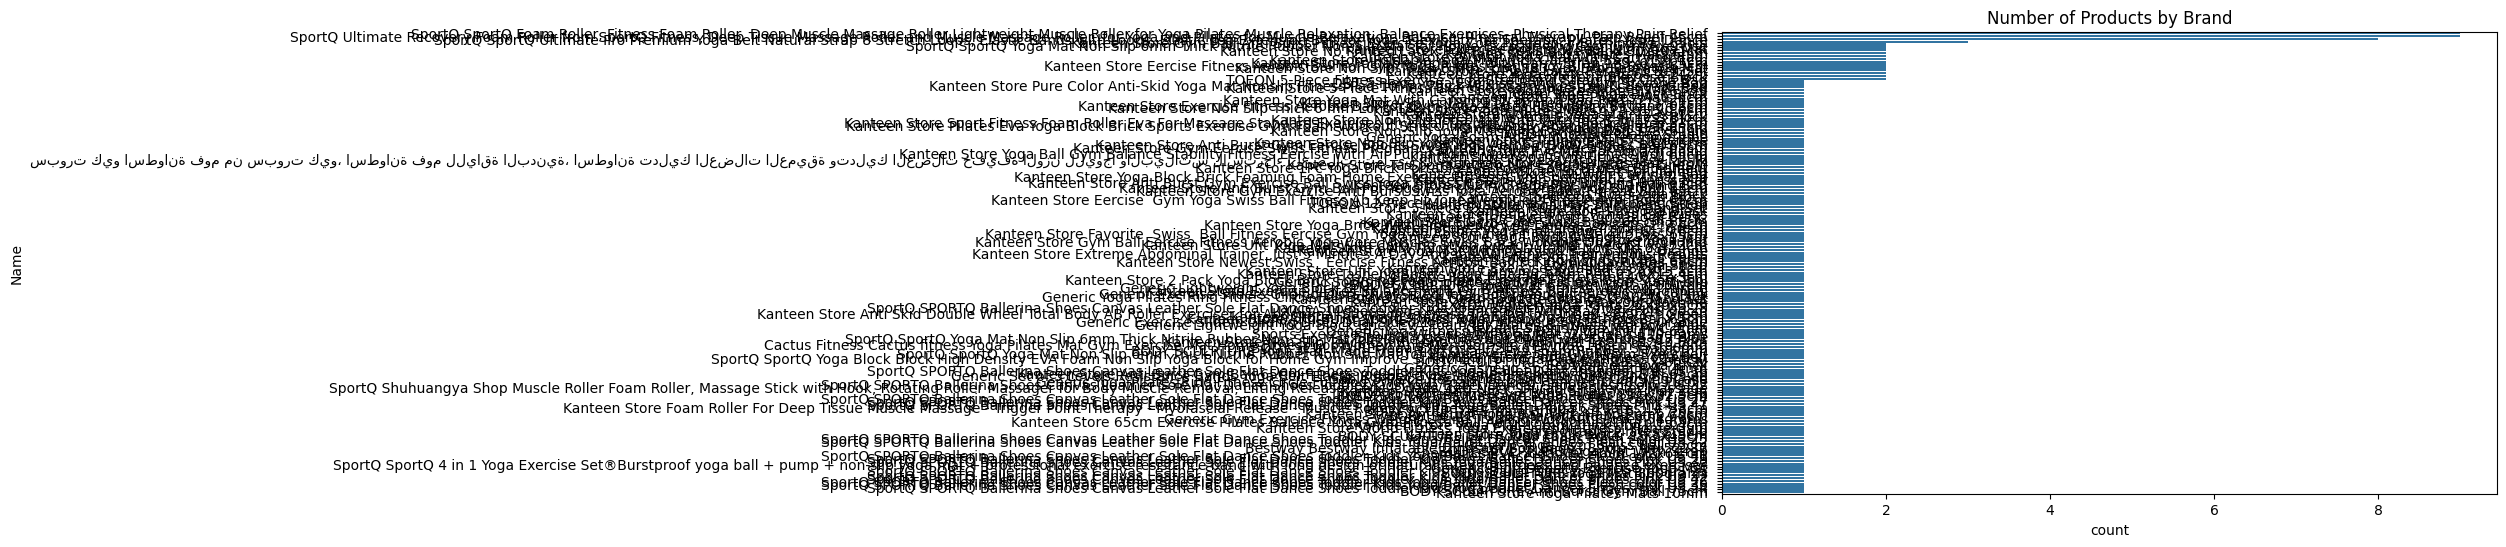

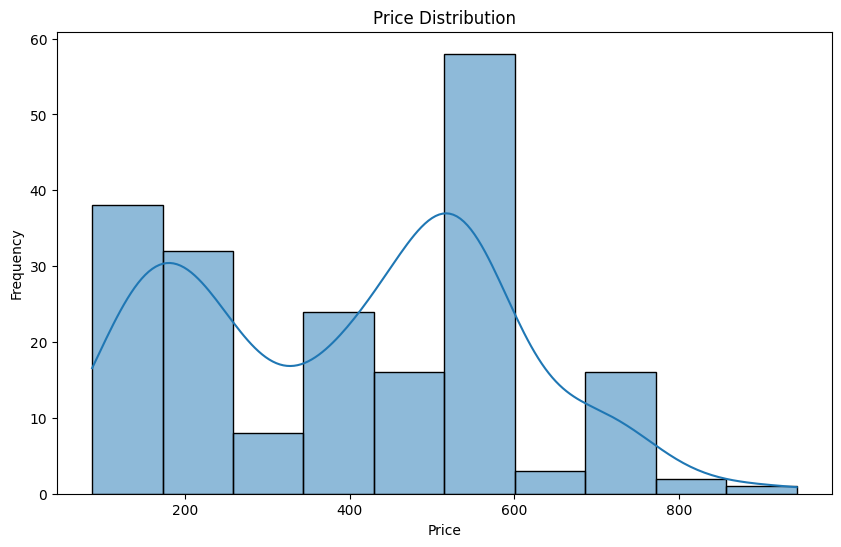

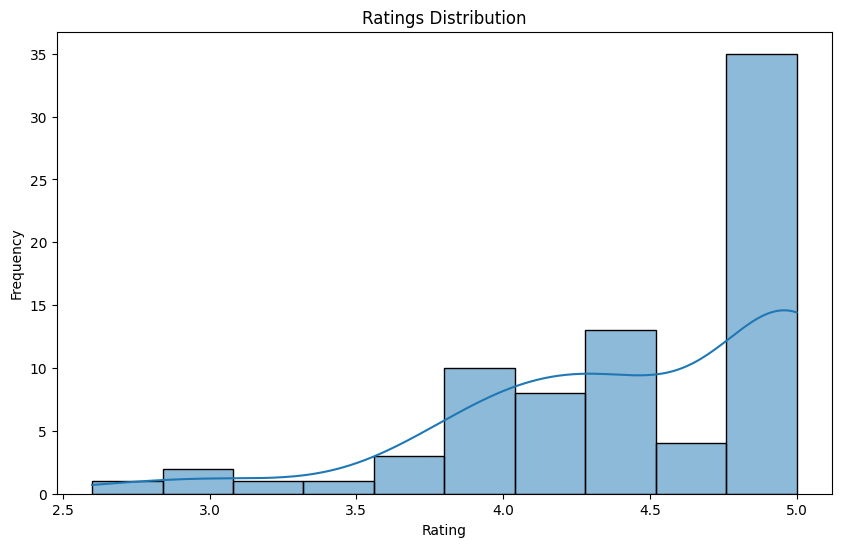

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it's a CSV, update the file path if necessary)
df = pd.read_csv('noon_products.csv')

# Cleaning the dataset
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Converting 'Price' to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # Converting 'Rating' to numeric

# Analysis

# a. Most Expensive Product
most_expensive_product = df.loc[df['Price'].idxmax()]
print(f"Most Expensive Product: {most_expensive_product['Name']}, Price: {most_expensive_product['Price']}")

# b. Cheapest Product
cheapest_product = df.loc[df['Price'].idxmin()]
print(f"Cheapest Product: {cheapest_product['Name']}, Price: {cheapest_product['Price']}")

# c. Number of Products from Each Brand
product_count_by_brand = df['Name'].value_counts()
print("\nNumber of Products from Each Brand:\n", product_count_by_brand)

# Plotting number of products by brand
plt.figure(figsize=(10,6))
sns.countplot(y='Name', data=df, order=df['Name'].value_counts().index)
plt.title("Number of Products by Brand")
plt.show()



# Example graph for Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=10, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Example graph for Ratings Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

